In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
# %load ../../loaders/imports.py
import sys, os
import numpy as np
import matplotlib.pyplot as plt
import time
import pdb

# Add the uoicorr directory to the path
sys.path.append('../../../uoicorr_run')

# Add the root directory of this repository
sys.path.append('../..')

from postprocess_utils import *
import pandas as pd
import sqlalchemy

In [3]:
from utils import gen_data, gen_covariance, sparsify_beta, gen_beta2

In [4]:
root_dir = '/media/akumar/Data/nse'

In [6]:
import pickle

In [7]:
with open('alpha_datalist.dat', 'rb') as f:
    alpha_datalist = pickle.load(f)

In [8]:
with open('alpha_datalist_uoi.dat', 'rb') as f:
    alpha_datalist_uoi = pickle.load(f)

In [9]:
alpha_datalist = pd.concat([pd.DataFrame(alpha_datalist), pd.DataFrame(alpha_datalist_uoi)])

### Simoid Fitting

In [ ]:
# Fit sigmoids to:

# (1) each algorithm, each selection method, each sparsity
# (2) the same, but separate by betawidth
# (3) combine the different SNR together

In [11]:
list(alpha_datalist.keys())

['df_name', 'betawidth', 'sparsity', 'alpha', 'sa', 'selection_method']

In [19]:
algorithms = np.unique(alpha_datalist['df_name'].values)
selection_methods = np.unique(alpha_datalist['selection_method'].values)
sparsity = np.unique(alpha_datalist['sparsity'].values)

In [17]:
from sigmoid import Sigmoid

In [ ]:
# Blue
c1 = ['#4286f4', '#99bdf7', '#00aeff']
# Green
c2 = ['#3ab700', '#bae288', '#64821d']
# Red
c3 = ['#e50b0b', '#ef5f5f', '#70001d']
# Cyan
c4 = ['#1ec9be', '#d799ff', '#572677']
# Orange
c5 = ['#e38f12']

marker_type = ['^', 'o', 's']

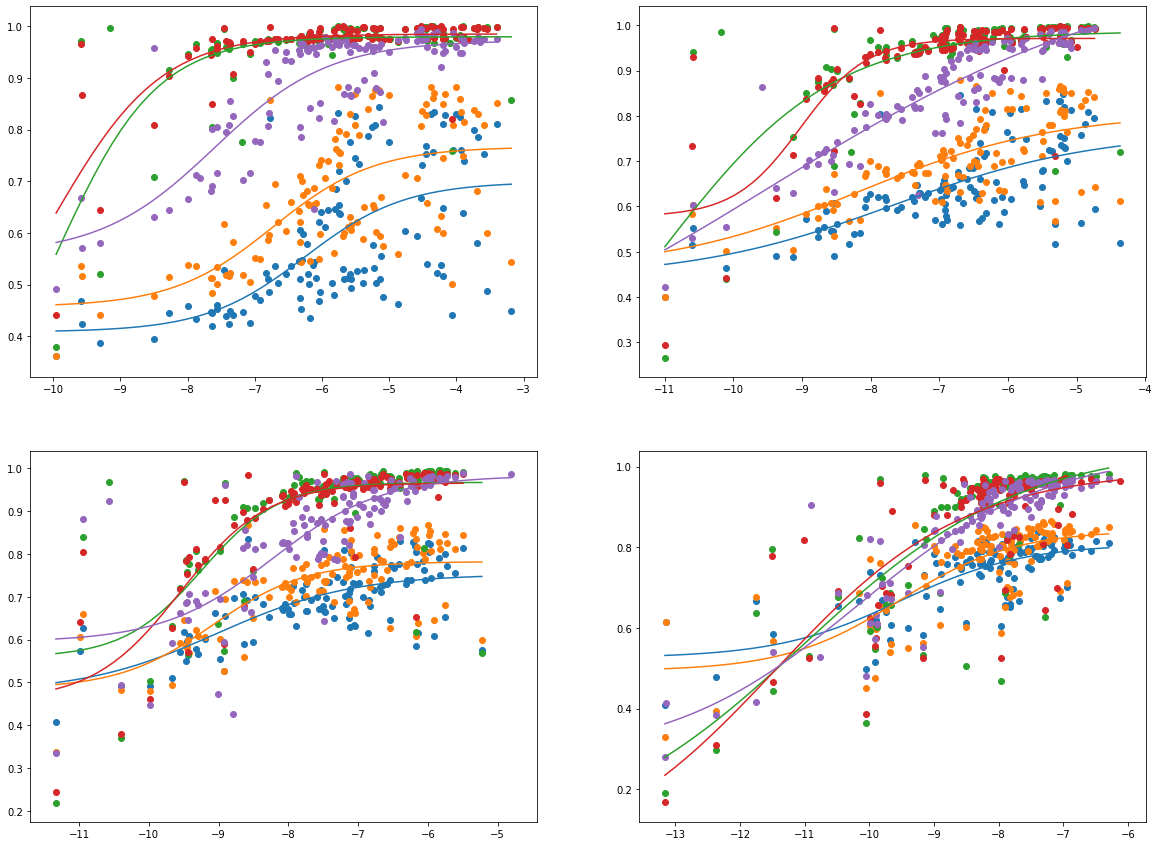

In [42]:
# Overlay the fits onto the data points to see how we are doing

sm = ['BIC']

# Eventually 
np_ratio = 4
kappa = 5

sparsity_ = [sparsity[3], sparsity[5], sparsity[7], sparsity[9]]

fig, ax = plt.subplots(2, 2, figsize = (20, 15))

for k, s in enumerate(sparsity_):

    a = ax[np.unravel_index(k, (2, 2))]
    
    for i, algorithm in enumerate(algorithms):
        for j, selection_method in enumerate(sm):            
            
            adl = apply_df_filters(alpha_datalist, df_name=algorithm,
                                   sparsity=s, selection_method=selection_method)
            
            # Take sa vs. log alpha and fit a sigmoid to it
            sigmoid = Sigmoid()
            alpha_mask = np.ma.log(adl['alpha'].values[0])
            mask = np.invert(alpha_mask.mask)
            alpha_ = np.log(adl['alpha'].values[0][mask])
            sa_ = adl['sa'].values[0][mask]
            sigmoid.fit(alpha_, sa_)
            a.scatter(alpha_, sa_)
            xx = np.linspace(min(alpha_), max(alpha_))
            a.plot(xx, sigmoid.sigmoid_fn(xx, *sigmoid.coef_))

In [ ]:
# Other summary metrics: 

# 'Expected' FNR/FPR and variance around it
# Use the statistics from above and sigmoid fits to construct decision trees about
# what algorithm to use/selection method to use considering 
# alpha, (eta?), SNR, n/p, density

# Come up with concrete 'Best of best' statistics

# Contrast with theory, when do the theoretical results seem helpful?

# Investigate 
# (1) aberrations in point clouds 
# (2) wtf is going on with eta calculation